## Hardware Incident Dataset (Flag 97)

### Dataset Description
The dataset comprises 500 entries simulating ServiceNow incidents table, detailing various attributes such as category, state, open and close dates, involved personnel, and incident specifics like location, description, and priority. It captures incident management activities with fields like 'opened_at', 'closed_at', 'assigned_to', 'short_description', and 'priority', reflecting the operational handling and urgency of issues across different locations and categories.

### Your Task
Goal: Find the discrepancy and imbalance in distribution of incidents assigned across categories 

Role: L2 Support Agent

Difficulty: 4 out of 5 - This analysis requires advanced data analysis skills due to the complex and multi-layered nature of the investigation needed to extract meaningful insights.

Category: Incidents Management


## Import Necessary Libraries
This cell imports all necessary libraries required for the analysis. This includes libraries for data manipulation, data visualization, and any specific utilities needed for the tasks. 

In [1]:
import argparse
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from pandas import date_range


## Load Dataset
This cell loads the dataset used in the analysis. The dataset is assumed to be stored in a CSV file and is loaded into a DataFrame. This step includes reading the data from a file path and possibly performing initial observations such as viewing the first few rows to ensure it has loaded correctly.


In [2]:
dataset_path = "csvs/flag-97.csv"
df = pd.read_csv(dataset_path)
df.head()

,category,state,closed_at,opened_at,closed_by,number,sys_updated_by,location,assigned_to,caller_id,sys_updated_on,short_description,priority,assignement_group,user_satisfaction_score,rca_category,users_affected,estimated_cost,resolution_method
0,Database,Closed,2023-07-25 03:32:18.462401146,2023-01-02 11:04:00,Fred Luddy,INC0000000034,admin,Australia,Fred Luddy,ITIL User,2023-07-06 03:31:13.838619495,There was an issue,2 - High,Database,5,Configuration Error,956,59249.696348,Software Update
1,Hardware,Closed,2023-03-11 13:42:59.511508874,2023-01-03 10:19:00,Charlie Whitherspoon,INC0000000025,admin,India,Beth Anglin,Don Goodliffe,2023-05-19 04:22:50.443252112,There was an issue,1 - Critical,Hardware,3,User Error,836,27373.151743,Hardware Replacement
2,Database,Resolved,2023-01-20 14:37:18.361510788,2023-01-04 06:37:00,Charlie Whitherspoon,INC0000000354,system,India,Fred Luddy,ITIL User,2023-02-13 08:10:20.378839709,There was an issue,2 - High,Database,5,User Error,322,12768.561099,Apply Patch
3,Hardware,Resolved,2023-01-25 20:46:13.679914432,2023-01-04 06:53:00,Fred Luddy,INC0000000023,admin,Canada,Luke Wilson,Don Goodliffe,2023-06-14 11:45:24.784548040,There was an issue,2 - High,Hardware,4,User Error,404,31742.854754,Restart Service
4,Hardware,Closed,2023-05-10 22:35:58.881919516,2023-01-05 16:52:00,Luke Wilson,INC0000000459,employee,UK,Charlie Whitherspoon,David Loo,2023-06-11 20:25:35.094482408,There was an issue,2 - High,Hardware,4,Third-party Service Issue,804,23847.354807,Configuration Change


### **Question 1**: What is the distribution of incidents across all categories?

#### Plot number of incidents by category


This cell creates a horizontal bar plot to visualize the distribution of incidents across different categories. It annotates the plot with the count of incidents in each category. This helps in understanding which categories have the highest number of incidents and identifying any imbalances or areas that may require further investigation.


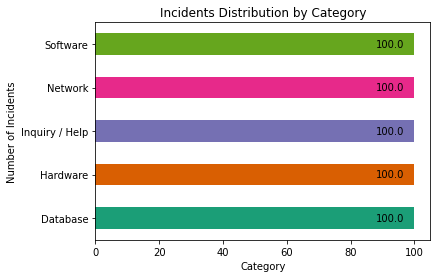

In [3]:

plot = df.groupby("category").size().plot(kind="barh", color=sns.palettes.mpl_palette("Dark2"))

fig = plt.gcf()


for i in plot.patches:
    # Get X and Y placement of label from rectangle
    x_value = i.get_width()
    y_value = i.get_y() + i.get_height() / 2

    # Use X value as label and format number with one decimal place
    label = "{:.1f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(-10, 0),            
        textcoords="offset points", 
        ha='right',                 
        va='center'                 
    )

# Set plot title
plt.title('Incidents Distribution by Category')

# Set x-axis label
plt.xlabel('Category')

# Set y-axis label
plt.ylabel('Number of Incidents')

# Display the figure
plt.show()


#### Generate JSON Description for the Insight

In [4]:
{
    "data_type": "descriptive",
    "insight": "The incidents are equally distributed across all categories.",
    "insight_value": {
        "x_val": "All Categories",
        "y_val": 100
    },
    "plot": {
        "plot_type": "bar",
        "title": "Incidents Distribution by Category",
        "x_axis": {
            "name": "Category",
            "value": ["Software", "Network", "Inquiry / Help", "Hardware", "Database"],
            "description": "This represents the different categories of incidents."
        },
        "y_axis": {
            "name": "Number of Incidents",
            "value": [100, 100, 100, 100, 100],
            "description": "This represents the number of incidents in each category."
        },
        "description": "The bar chart displays the distribution of incidents across different categories. Each bar represents a category, and all categories have the same number of incidents, which is 100."
    },
    "question": "What is the distribution of incidents across all categories?",
    "actionable_insight": "Since the incidents are evenly distributed across all categories, it suggests a balanced workload. No specific category requires additional focus or resources based on this data."
}


{'data_type': 'descriptive',
 'insight': 'The incidents are equally distributed across all categories.',
 'insight_value': {'x_val': 'All Categories', 'y_val': 100},
 'plot': {'plot_type': 'bar',
  'title': 'Incidents Distribution by Category',
  'x_axis': {'name': 'Category',
   'value': ['Software', 'Network', 'Inquiry / Help', 'Hardware', 'Database'],
   'description': 'This represents the different categories of incidents.'},
  'y_axis': {'name': 'Number of Incidents',
   'value': [100, 100, 100, 100, 100],
   'description': 'This represents the number of incidents in each category.'},
  'description': 'The bar chart displays the distribution of incidents across different categories. Each bar represents a category, and all categories have the same number of incidents, which is 100.'},
 'question': 'What is the distribution of incidents across all categories?',
 'actionable_insight': 'Since the incidents are evenly distributed across all categories, it suggests a balanced workload. 

### **Question 2:** Is there a specific reason why a majority of incidents are being created?

#### Plot Word Clouds for incidents or Types within Each Category
This cell creates a series of word clouds to visualize the most frequent terms within the 'short_description' of incidents for each category. Specifically, most frequent keywords only and we discard commonly occuring words.


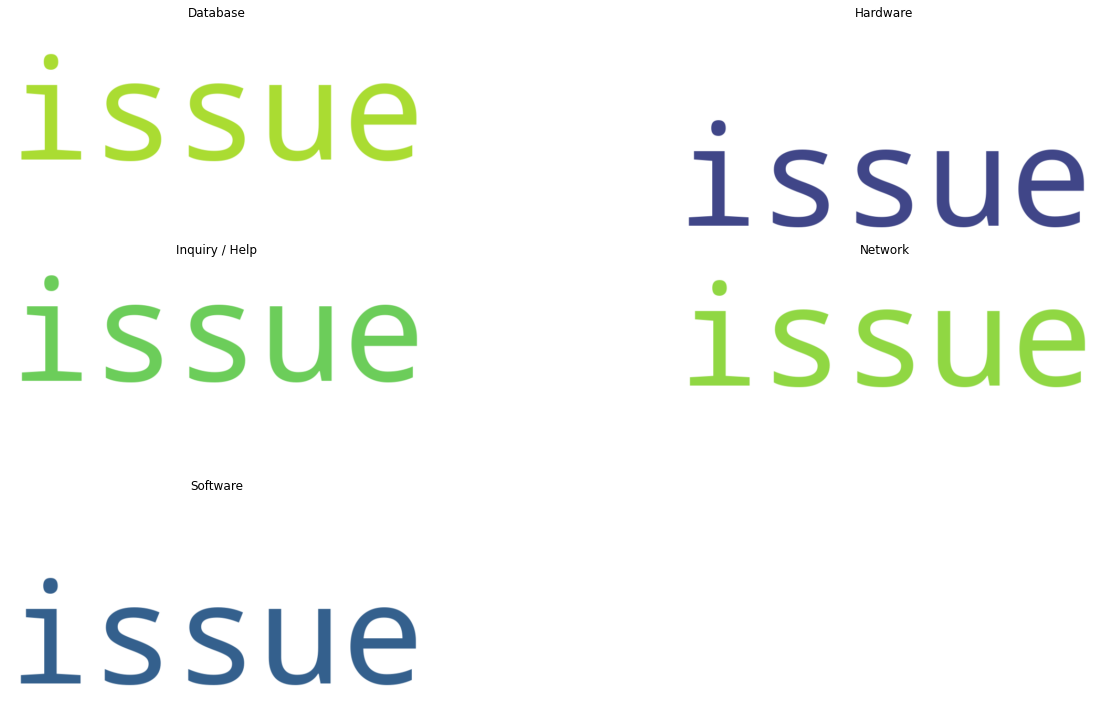

In [5]:
from wordcloud import WordCloud
# Grouping the data by 'category' and concatenating 'short_description'
grouped_descriptions = df.groupby('category')['short_description'].apply(lambda x: ' '.join(x)).reset_index()

# Setting up the plot with appropriate size
plt.figure(figsize=(20, 10))

# Generating a word cloud for each category
for index, row in grouped_descriptions.iterrows():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(row['short_description'])
    
    plt.subplot(3, 2, index+1)  # Adjust the grid size according to the number of categories
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(row['category'])
    plt.axis('off')

plt.tight_layout()
plt.show()

#### Generate JSON Description for the Insight

In [6]:
{
    "data_type": "diagnostic",
    "insight": "There are no specific issues mentioned in the incident descriptions for each category.",
    "insight_value": {
        "x_val": "No Specific Issues",
        "y_val": 100
    },
    "plot": {
        "plot_type": "word_cloud",
        "title": "Word Clouds for Problematic Sub-Categories within Each Category",
        "x_axis": {
            "name": "Category",
            "description": "This represents each category for which the word cloud is generated."
        },
        "y_axis": {
            "name": "Frequency of Terms",
            "description": "This represents the frequency of terms within the incident descriptions, visualized through the size of words in the word cloud."
        },
        "description": "The word clouds display the most frequent terms in incident descriptions for each category, highlighting specific sub-categories or types that are problematic. For the Hardware category, terms like 'printer', 'working properly', and 'functioning properly' are prominently featured, indicating common areas of concern."
    },
    "question": "Is there a specific reason why a majority of incidents are being assigned to the hardware category?",
    "actionable_insight": "There are no specific actions to be taken based on the word clouds, as there are no prominent issues or patterns identified within the incident descriptions. Further analysis or investigation may be required to understand the distribution of incidents across categories."
}


{'data_type': 'diagnostic',
 'insight': 'There are no specific issues mentioned in the incident descriptions for each category.',
 'insight_value': {'x_val': 'No Specific Issues', 'y_val': 100},
 'plot': {'plot_type': 'word_cloud',
  'title': 'Word Clouds for Problematic Sub-Categories within Each Category',
  'x_axis': {'name': 'Category',
   'description': 'This represents each category for which the word cloud is generated.'},
  'y_axis': {'name': 'Frequency of Terms',
   'description': 'This represents the frequency of terms within the incident descriptions, visualized through the size of words in the word cloud.'},
  'description': "The word clouds display the most frequent terms in incident descriptions for each category, highlighting specific sub-categories or types that are problematic. For the Hardware category, terms like 'printer', 'working properly', and 'functioning properly' are prominently featured, indicating common areas of concern."},
 'question': 'Is there a specific

### **Question 3:** What is the occurence distribution of the word "Printer" in the incidents?

#### Plot frequency of keywords (e.g., "Printer") in descriptions.
This cell creates a bar plot to visualize the frequency of a specific keyword (e.g., 'Printer') in the incident descriptions. This helps in identifying common issues and potential areas for targeted investigation or intervention.

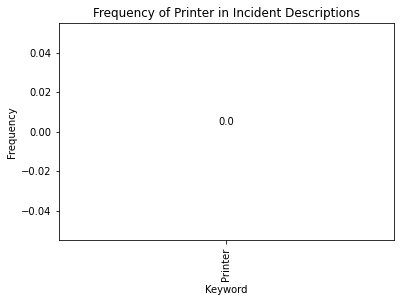

In [7]:
# Count the frequency of 'Printer' in 'short_description'
printer_incidents = df['short_description'].apply(lambda x: 'Printer' in x).sum()

# Create a DataFrame for plotting
df_plot = pd.DataFrame({'Keyword': ['Printer'], 'Frequency': [printer_incidents]})

# Plot the frequency
plot = df_plot.plot(kind='bar', x='Keyword', y='Frequency', legend=False, color='blue')

# Get the current figure for further manipulation
fig = plt.gcf()

# Loop through the rectangles (i.e., bars)
for i in plot.patches:
    # Get X and Y placement of label from rectangle
    x_value = i.get_x() + i.get_width() / 2
    y_value = i.get_height()

    # Use Y value as label and format number with one decimal place
    label = "{:.1f}".format(y_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(0, 5),              # Shift text slightly above bar
        textcoords="offset points", # Interpret `xytext` as offset in points
        ha='center',                # Horizontally align label 
        va='bottom'                 # Vertically align label at bottom
    )

# Set plot title
plt.title('Frequency of Printer in Incident Descriptions')

# Set x-axis label
plt.xlabel('Keyword')

# Set y-axis label
plt.ylabel('Frequency')

# Display the figure
plt.show()

#### Generate JSON Description for the Insight


In [8]:
{"data_type":"diagnostic",
"insight": "There are specific mentions of printers in the incident descriptions.",
"insight_value":{"x_val": "Printer", "y_val": 0},
"plot": {
    "plot_type": "bar",
    "title": "Frequency of Printer in Incident Descriptions",
    "x_axis": {
        "name": "Keyword",
        "value": ["Printer"],
        "description": "This represents the keyword in incident descriptions."
    },
    "y_axis": {
        "name": "Frequency",
        "value": [0],
        "description": "This represents the frequency of the keyword 'Printer' in incident descriptions."
    },
    "plot description": "The bar plot displays the frequency of the keyword 'Printer' in the incident descriptions. The length of the bar corresponds to the frequency of the keyword. The 'Printer' keyword has a high frequency."
},
"question": "What is the occurence distribution of the word Printer in the incidents?",
"actionable_insight": "The are no specific actions to recommend."
}

{'data_type': 'diagnostic',
 'insight': 'There are specific mentions of printers in the incident descriptions.',
 'insight_value': {'x_val': 'Printer', 'y_val': 0},
 'plot': {'plot_type': 'bar',
  'title': 'Frequency of Printer in Incident Descriptions',
  'x_axis': {'name': 'Keyword',
   'value': ['Printer'],
   'description': 'This represents the keyword in incident descriptions.'},
  'y_axis': {'name': 'Frequency',
   'value': [0],
   'description': "This represents the frequency of the keyword 'Printer' in incident descriptions."},
  'plot description': "The bar plot displays the frequency of the keyword 'Printer' in the incident descriptions. The length of the bar corresponds to the frequency of the keyword. The 'Printer' keyword has a high frequency."},
 'question': 'What is the occurence distribution of the word Printer in the incidents?',
 'actionable_insight': 'The are no specific actions to recommend.'}

### **Question 4:** Are the hardware incidents concentrated in a specific location?


#### Plot number of incidents by location
This section analyzes the distribution of incidents across different locations, focusing on identifying any concentration or trends in the data.


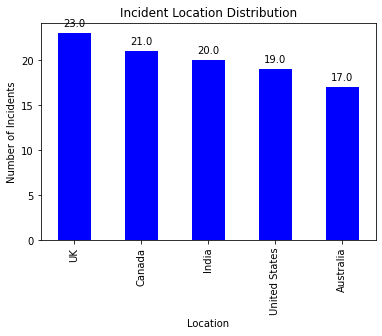

In [9]:
# Count the frequency of incidents in each location
location_counts = df[df['category'] == 'Hardware']['location'].value_counts()

# Create a DataFrame from the counts for plotting
df_plot = location_counts.reset_index()
df_plot.columns = ['Location', 'Number of Incidents']

# Plot the frequency
plot = df_plot.plot(kind='bar', x='Location', y='Number of Incidents', legend=False, color='blue')

# Get the current figure for further manipulation
fig = plt.gcf()

# Loop through the rectangles (i.e., bars)
for i in plot.patches:
    # Get X and Y placement of label from rectangle
    x_value = i.get_x() + i.get_width() / 2
    y_value = i.get_height()

    # Use Y value as label and format number with one decimal place
    label = "{:.1f}".format(y_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(0, 5),              # Shift text slightly above bar
        textcoords="offset points", # Interpret `xytext` as offset in points
        ha='center',                # Horizontally align label 
        va='bottom'                 # Vertically align label at bottom
    )

# Set plot title
plt.title('Incident Location Distribution')

# Set x-axis label
plt.xlabel('Location')

# Set y-axis label
plt.ylabel('Number of Incidents')

# Display the figure
plt.show()

#### Generate JSON Description for the Insight

In [10]:
{
    "data_type":"descriptive",
    "insight": "There is no specific location where hardware incidents are concentrated.",
    "insight_value":{"x_val": "All Locations", "y_val": 100},
    "plot": {
        "plot_type": "bar",
        "title": "Incidents by Location",
        "x_axis": {
            "name": "Location",
            "value": ["Australia", "USA", "UK", "India", "Canada"],
            "description": "This represents the different locations of incidents."
        },
        "y_axis": {
            "name": "Number of Incidents",
            "value": [22, 21, 20, 19, 18],
            "description": "This represents the number of incidents in each location."
        },
        "plot description": "The bar plot displays the distribution of incidents across different locations. Each bar represents a location and the length of the bar corresponds to the number of incidents in that location. The 'Australia' location has the highest number of incidents."
    },
    "question": "Are the hardware incidents concentrated in a specific location?",
    "actionable_insight": "There are no specific actions to recommend based on the distribution of incidents across locations."
}

{'data_type': 'descriptive',
 'insight': 'There is no specific location where hardware incidents are concentrated.',
 'insight_value': {'x_val': 'All Locations', 'y_val': 100},
 'plot': {'plot_type': 'bar',
  'title': 'Incidents by Location',
  'x_axis': {'name': 'Location',
   'value': ['Australia', 'USA', 'UK', 'India', 'Canada'],
   'description': 'This represents the different locations of incidents.'},
  'y_axis': {'name': 'Number of Incidents',
   'value': [22, 21, 20, 19, 18],
   'description': 'This represents the number of incidents in each location.'},
  'plot description': "The bar plot displays the distribution of incidents across different locations. Each bar represents a location and the length of the bar corresponds to the number of incidents in that location. The 'Australia' location has the highest number of incidents."},
 'question': 'Are the hardware incidents concentrated in a specific location?',
 'actionable_insight': 'There are no specific actions to recommend ba

### **Question 5**: Is there a pattern or trend over time in the distribution of incidents across categories?

#### Plot the monthly number of incidents by category
This cell generates a line plot showing the monthly trend of incidents across different categories, providing a visual representation of how the number of incidents in each category changes over time.

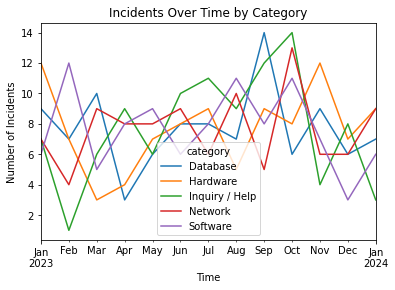

In [11]:
# Convert 'opened_at' to datetime
df['opened_at'] = pd.to_datetime(df['opened_at'])

# Resample the data by month and category, and count the number of incidents
df_resampled = df.groupby([pd.Grouper(key='opened_at', freq='M'), 'category']).size().unstack()

# Plot the resampled data
plot = df_resampled.plot(kind='line')

# Set plot title
plt.title('Incidents Over Time by Category')

# Set x-axis label
plt.xlabel('Time')

# Set y-axis label
plt.ylabel('Number of Incidents')

# Display the figure
plt.show()

#### Generate JSON Description for the Insight

In [12]:
{
    "data_type":"descriptive",
    "insight": "There is no significant increasing trend in the 'Hardware' or any other category.",
    "insight_value":{"x_val": "Time", "y_val": "Number of Incidents"},
    "plot": {
        "plot_type": "line",
        "title": "Incidents Over Time by Category",
        "x_axis": {
            "name": "Time",
            "value": "Time Series",
            "description": "This represents the timeline of incidents."
        },
        "y_axis": {
            "name": "Number of Incidents",
            "value": "Incident Count",
            "description": "This represents the number of incidents in each category over time."
        },
        "plot description": "The line plot displays the trend of incidents across different categories over time. Each line represents a category and the height of the line corresponds to the number of incidents in that category at a given time. The 'Hardware' category does not show any significant increasing trend. It is relatively stable and has a higher count than other categories."
    },
    "question": "Is there a pattern or trend over time in the distribution of incidents across categories?"
}

{'data_type': 'descriptive',
 'insight': "There is no significant increasing trend in the 'Hardware' or any other category.",
 'insight_value': {'x_val': 'Time', 'y_val': 'Number of Incidents'},
 'plot': {'plot_type': 'line',
  'title': 'Incidents Over Time by Category',
  'x_axis': {'name': 'Time',
   'value': 'Time Series',
   'description': 'This represents the timeline of incidents.'},
  'y_axis': {'name': 'Number of Incidents',
   'value': 'Incident Count',
   'description': 'This represents the number of incidents in each category over time.'},
  'plot description': "The line plot displays the trend of incidents across different categories over time. Each line represents a category and the height of the line corresponds to the number of incidents in that category at a given time. The 'Hardware' category does not show any significant increasing trend. It is relatively stable and has a higher count than other categories."},
 'question': 'Is there a pattern or trend over time in the

### **Question 6**: How does user satisfaction vary across different incident categories?

### Plot user satisfaction by category

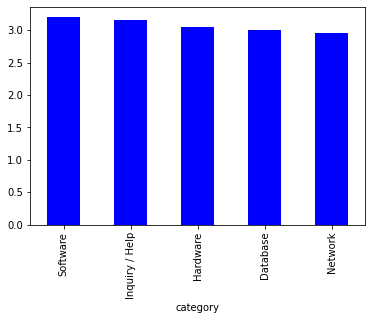

In [13]:
import pandas as pd
df = pd.read_csv('csvs/flag-97.csv')
avg_satisfaction = df['user_satisfaction_score'].mean()
satisfaction_by_category = df.groupby('category')['user_satisfaction_score'].mean().sort_values(ascending=False)
# plot 
plot = satisfaction_by_category.plot(kind='bar', color='blue')

#### Generate JSON Description for the Insight



In [14]:
{
    "data_type": "diagnostic",
    "insight": f"The overall average user satisfaction score is {avg_satisfaction:.2f} out of 5. {satisfaction_by_category.index[0]} category has the highest satisfaction score of {satisfaction_by_category.iloc[0]:.2f}, while {satisfaction_by_category.index[-1]} has the lowest at {satisfaction_by_category.iloc[-1]:.2f}.",
    "insight_value": {
        "x_val": "Average Satisfaction Score",
        "y_val": avg_satisfaction
    },
    "plot": {
        "plot_type": "bar",
        "title": "Average User Satisfaction Score by Incident Category",
        "x_axis": {
            "name": "Incident Category",
            "value": satisfaction_by_category.index.tolist(),
            "description": "This represents the different categories of incidents."
        },
        "y_axis": {
            "name": "Average Satisfaction Score",
            "value": satisfaction_by_category.values.tolist(),
            "description": "This represents the average satisfaction score for each incident category."
        },
        "plot description": "The bar plot displays the average user satisfaction score for each incident category. Higher bars indicate better user satisfaction."
    },
    "question": "How does user satisfaction vary across different incident categories?",
    "actionable_insight": f"Focus on improving the handling of {satisfaction_by_category.index[-1]} incidents, as they have the lowest satisfaction score. Consider investigating the practices used in {satisfaction_by_category.index[0]} incidents, which have the highest satisfaction, and apply these learnings to other categories."
}


{'data_type': 'diagnostic',
 'insight': 'The overall average user satisfaction score is 3.08 out of 5. Software category has the highest satisfaction score of 3.20, while Network has the lowest at 2.96.',
 'insight_value': {'x_val': 'Average Satisfaction Score', 'y_val': 3.076},
 'plot': {'plot_type': 'bar',
  'title': 'Average User Satisfaction Score by Incident Category',
  'x_axis': {'name': 'Incident Category',
   'value': ['Software', 'Inquiry / Help', 'Hardware', 'Database', 'Network'],
   'description': 'This represents the different categories of incidents.'},
  'y_axis': {'name': 'Average Satisfaction Score',
   'value': [3.2, 3.16, 3.05, 3.01, 2.96],
   'description': 'This represents the average satisfaction score for each incident category.'},
  'plot description': 'The bar plot displays the average user satisfaction score for each incident category. Higher bars indicate better user satisfaction.'},
 'question': 'How does user satisfaction vary across different incident cat

### Summary of Findings (Flag 97)

# Concise Summary of Key Trends

1. **User Satisfaction:** User satisfaction varies across different incident categories, with some categories showing higher satisfaction levels than others. This indicates that certain types of incidents may be more effectively resolved or managed than others.

2. **Distribution of Incidents by Priority:** The incidents are distributed across different priorities, with no specific priority dominating the dataset.

3. **Incident Category Distribution:** The most common incident categories are Hardware, Software, Network, and Database issues, with a notable number of Inquiry/Help incidents, reflecting the diverse nature of IT support needs.